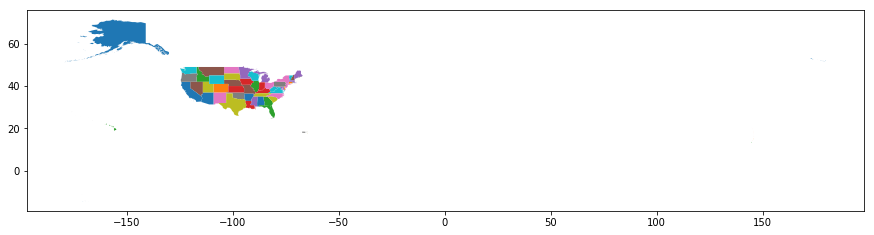

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline
statemap = gpd.read_file('../data/external/cartographic-us-states/cb_2017_us_state_500k.shp')
fig, ax = plt.subplots(figsize = (15,15))
statemap.plot(column='NAME', ax=ax)

In [127]:
dtype = {'lat': float, 'lng': float, 'type': object, 'zip': object}
df = pd.read_csv('../data/interim/zipcodes_100.csv', dtype=dtype, index_col='zip')
crs = {'init': 'epsg:4326'}
df.head()

,lat,lng,type
zip,,,
602,18.38,-67.18,STANDARD
687,18.32,-66.40,STANDARD
738,18.33,-65.65,STANDARD
1001,42.06,-72.61,STANDARD
1247,42.68,-73.11,STANDARD


In [128]:
geometry = [Point(xy) for xy in zip(df['lng'],df['lat'])]
geometry[:3]

In [129]:
geo_df = gpd.GeoDataFrame(df, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

,lat,lng,type,geometry
zip,,,,
602,18.38,-67.18,STANDARD,POINT (-67.18000000000001 18.38)
687,18.32,-66.40,STANDARD,POINT (-66.40000000000001 18.32)
738,18.33,-65.65,STANDARD,POINT (-65.65000000000001 18.33)
1001,42.06,-72.61,STANDARD,POINT (-72.61 42.06)
1247,42.68,-73.11,STANDARD,POINT (-73.11 42.68)


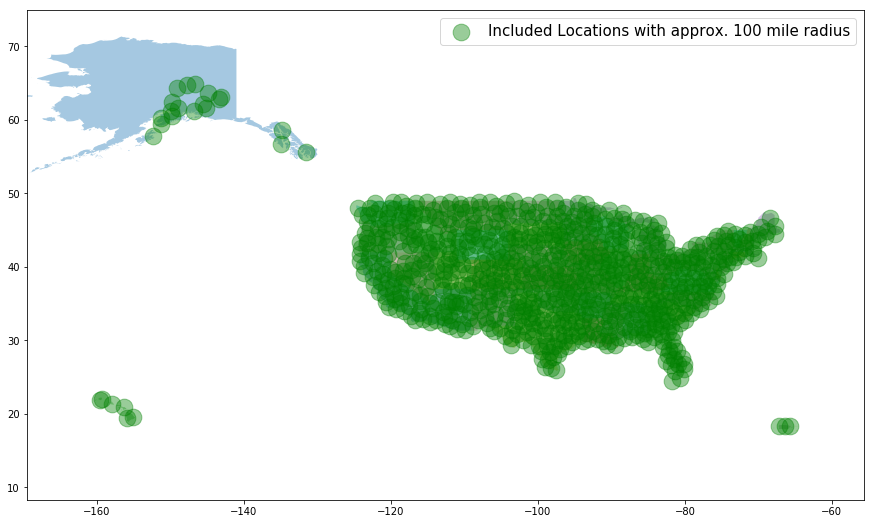

In [132]:
#combine the shapefile and plot points
fig, ax = plt.subplots(figsize = (15,15))
statemap.plot(column='NAME', ax=ax, alpha=0.4)
geo_df.plot(ax=ax,markersize=280, color="green", marker="o", alpha=0.4, label="Included Locations with approx. 100 mile radius")
minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx - 10, maxx + 10)
ax.set_ylim(miny - 10, maxy + 10)
plt.legend(prop={'size': 15})